# Regresión Lineal

In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Creación del modelo

Crea el modelo de regresión lineal

In [9]:
modelo = LinearRegression()

# Datos
Carga el conjunto de datos 'corpus_lr.csv'.


In [10]:
datos = pd.read_csv('corpus_lr.csv')

# Muestra los datos

Veamos que pinta tiene este conjunto de datos.

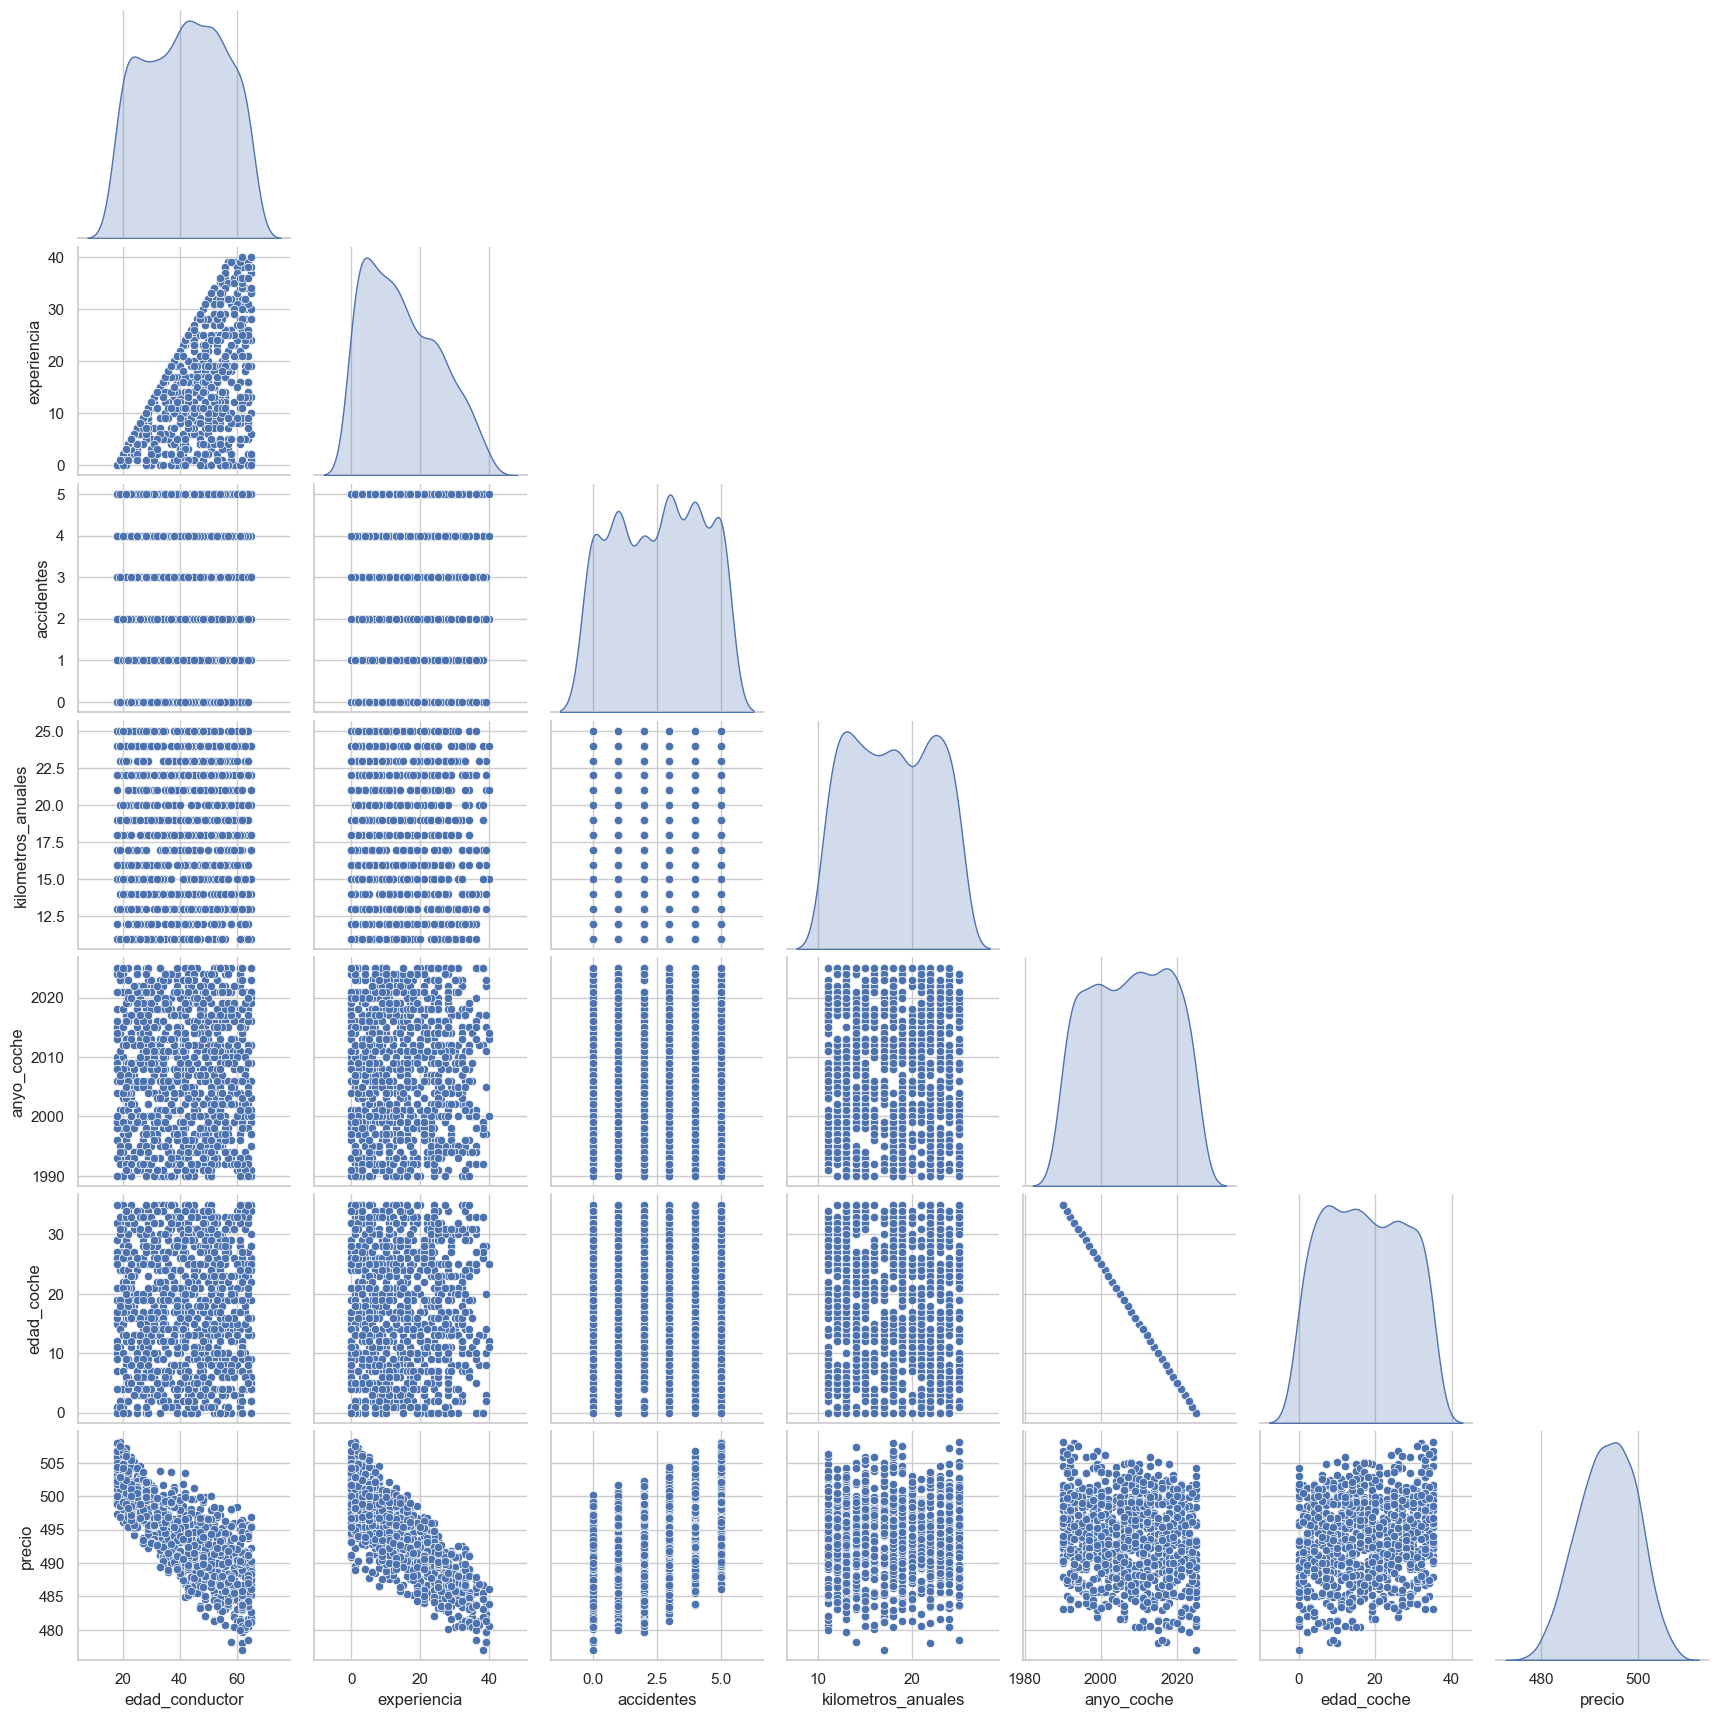

In [11]:
sns.set(style="whitegrid", context="notebook")
pairplot_fig = sns.pairplot(datos, diag_kind="kde", corner=True)

plt.show()

# Dividir los datos y el objetivo

Crea un dataframe 'x' que contenga todas las columnas menos la columna objetivo, que en este caso, es el precio.

Crea un dataframe 'y' que contenga solo la columna precio

Separa las muestras en train y test.

In [23]:
x = datos.drop('precio', axis = 1)
y = datos ['precio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Entrenamiento del modelo

In [24]:
modelo.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predicción con el conjunto de test.

In [33]:
y_pred = modelo.predict(x_test)

# Cálculo de métricas

Muestras las métricas MAE, MSE y R2 en baso a los valores predichos con el conjunto de test.

In [34]:
print("MAE:", mean_absolute_error (y_test, y_pred))
print("MSE:", mean_squared_error (y_test, y_pred))
print("R2:", r2_score (y_test, y_pred))

MAE: 1.0658141036401503e-13
MSE: 1.1777630206077289e-26
R2: 1.0


# Prueba tu propio perfil

Crea tu perfil y comprueba cuál sería tu precio.

In [29]:
mi_perfil = pd.DataFrame({
    "edad_conductor": [21],
    "experiencia": [0],
    "accidentes": [0],
    "kilometros_anuales": [18],
    "anyo_coche": [2020],
    "edad_coche": [5]
})

precio = modelo.predict(mi_perfil)
print(f"Precio estimado del seguro: {precio[0]:.2f}")

Precio estimado del seguro: 497.20


## Diferencias en la tasa de aprendizaje

Con el modelo LinearRegression de sklearn no podemos ajustar la tasa de aprendizaje.

Vamos a probar con un modelo más rústico.

Los pasos son más o menos los mismos

In [35]:
# Cargar tus datos
datos = pd.read_csv("corpus_lr.csv")

# Separar variables predictoras y variable objetivo
x = datos[["edad_conductor", "experiencia", "accidentes", "kilometros_anuales", "anyo_coche", "edad_coche"]]
y = datos["precio"]

# Dividir en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalizar (escalado estándar)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Añadir columna de unos para el bias
X = np.zeros((x_train_scaled.shape[0], x_train_scaled.shape[1] + 1))
X[:, 0] = 1  # primera columna de unos (bias)
X[:, 1:] = x_train_scaled

y = y_train.values.reshape(-1, 1)

# Inicializar pesos (coeficientes)
np.random.seed(42)
theta = np.random.randn(X.shape[1], 1)

# Learning rate

Prueba con diferentes valores de learning rate a ver que sucede.

También puedes probar a cambiar el número de épocas.

Epoch 0, Cost: 36620.3317
Epoch 100, Cost: 33134.4959
Epoch 200, Cost: 29980.4790
Epoch 300, Cost: 27126.6938
Epoch 400, Cost: 24544.5604
Epoch 500, Cost: 22208.2194
Epoch 600, Cost: 20094.2732
Epoch 700, Cost: 18181.5518
Epoch 800, Cost: 16450.9001
Epoch 900, Cost: 14884.9868
Epoch 1000, Cost: 13468.1303
Epoch 1100, Cost: 12186.1419
Epoch 1200, Cost: 11026.1834
Epoch 1300, Cost: 9976.6388
Epoch 1400, Cost: 9026.9980
Epoch 1500, Cost: 8167.7510
Epoch 1600, Cost: 7390.2936
Epoch 1700, Cost: 6686.8401
Epoch 1800, Cost: 6050.3463
Epoch 1900, Cost: 5474.4384
Epoch 2000, Cost: 4953.3493
Epoch 2100, Cost: 4481.8610
Epoch 2200, Cost: 4055.2520
Epoch 2300, Cost: 3669.2505
Epoch 2400, Cost: 3319.9910
Epoch 2500, Cost: 3003.9763
Epoch 2600, Cost: 2718.0418
Epoch 2700, Cost: 2459.3243
Epoch 2800, Cost: 2225.2331
Epoch 2900, Cost: 2013.4240
Coeficientes (bias primero): [ 4.33301515e+02 -2.90634301e+00 -2.83180634e+00  2.36696747e+00
  1.76708284e-01  1.50907425e-01  1.19416843e+00]


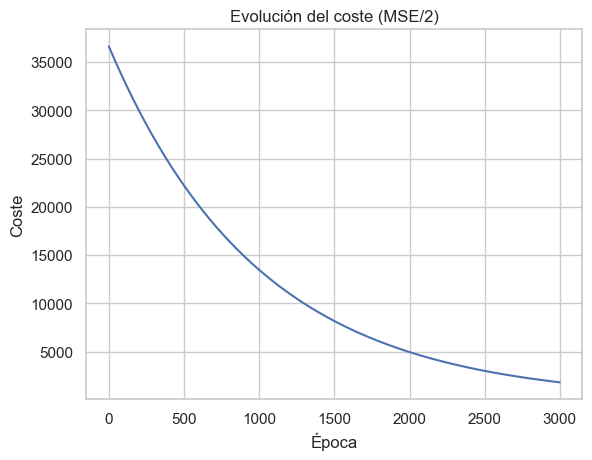

In [38]:
# Parámetros
learning_rate = 0.0005
n_epochs = 3000

m = len(y)
costs = []

# Entrenamiento
for epoch in range(n_epochs):
    # --- Paso 1: predicción ---
    y_pred = np.zeros_like(y)
    for i in range(m):
        suma = 0
        for j in range(X.shape[1]):
            suma += X[i, j] * theta[j, 0]
        y_pred[i, 0] = suma

    # --- Paso 2: calcular error ---
    error = y_pred - y

    # --- Paso 3: calcular gradiente ---
    grad = np.zeros_like(theta)
    for j in range(X.shape[1]):  # para cada parámetro
        suma_grad = 0
        for i in range(m):
            suma_grad += error[i, 0] * X[i, j]
        grad[j, 0] = suma_grad / m

    # --- Paso 4: actualizar parámetros ---
    for j in range(X.shape[1]):
        theta[j, 0] -= learning_rate * grad[j, 0]

    # --- Paso 5: calcular y guardar coste ---
    cost = (1/(2*m)) * np.sum(error ** 2)
    costs.append(cost)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")

# Resultados finales
print("Coeficientes (bias primero):", theta.flatten())

# Evolución del coste
plt.plot(costs)
plt.title("Evolución del coste (MSE/2)")
plt.xlabel("Época")
plt.ylabel("Coste")
plt.grid(True)
plt.show()
